<a href="https://colab.research.google.com/github/FranciaAlday/Proyectos/blob/main/F%C3%ADsicaComputacional/Proyectos/Copia_de_DL_Proyecto_final_Rocas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Identificación de Imagenes
Despues de descomprimir nuestra set de imagenes la subimos a Drive, para qué desde allí se realice el analisis

In [ ]:
import numpy as np #importamos las librerias
import os
import re
import matplotlib.pyplot as plt
from skimage.transform import resize

In [ ]:
Raiz=os.getcwdb() #ruta donde nos encontramos
print(Raiz)
dic_actual=os.chdir("/content/drive/My Drive/Rocas")


b'/content'


In [ ]:
print(os.getcwdb())
print(os.listdir(dic_actual)) #solo ocuparemos biotita, malachite y cuarzo

b'/content/drive/MyDrive/Rocas'
['biotite', 'malachite', 'quartz', 'logs']


Las imagenes se  encuentran en diferentes tamaños por lo que vamos a poner todas las imagenes de las mismas dimensiónes, para evitar tener problemas de dimenciones del arreglo en los pasos posteriores

b'/content/drive/My Drive/Rocas/biotite'


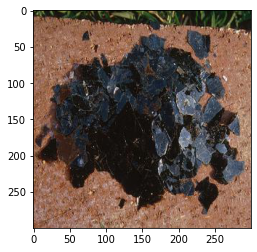

In [ ]:
dic_biotite=os.chdir("/content/drive/My Drive/Rocas/biotite")
print(os.getcwdb())
biotite=os.listdir(dic_biotite) #definimos las entradas con los nomnres de las imegenes
for i in range(len(biotite)): #pasamos una por una para agregar la imagen
    im = plt.imread(biotite[i]) #leemos las imagenes una por una en la carpeta biotite
    res = resize(im, (300, 300)) #volvemos a la imagenes de 300x300pp
    plt.imshow(res) #guardamos la nueva imagen
    plt.imsave(biotite[i],res) #mostramos la ultima como ejemplo

b'/content/drive/My Drive/Rocas/malachite'


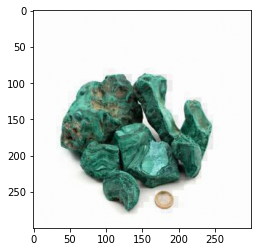

In [ ]:
dic_malachite=os.chdir("/content/drive/My Drive/Rocas/malachite") #repetimos el proceso
print(os.getcwdb())
malachite=os.listdir(dic_malachite)
type(malachite[1])
for i in range(len(malachite)):
    im = plt.imread(malachite[i])
    res = resize(im, (300, 300))
    plt.imshow(res)
    plt.imsave(malachite[i],res)

b'/content/drive/My Drive/Rocas/quartz'


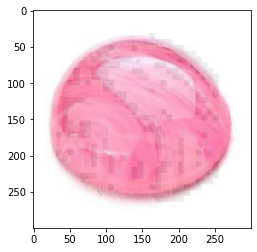

In [ ]:
dic_quartz=os.chdir("/content/drive/My Drive/Rocas/quartz") #repetimos el proceso
print(os.getcwdb())
quartz=os.listdir(dic_quartz)
for i in range(len(quartz)):
    im = plt.imread(quartz[i])
    res = resize(im, (300, 300))
    plt.imshow(res)
    plt.imsave(quartz[i],res)

Carpeta dónde estan las imagenes

https://drive.google.com/drive/folders/1Pz4pQ5fxZ4qzI9r90P-YpktR5atLydr9?usp=sharing

In [ ]:
Raiz=os.getcwdb() #vemos la dirección actual
print(Raiz)
dic_rocas=os.chdir('/content/drive/My Drive/Rocas/') #nos colocamos en rocas
print(os.getcwdb())
dic_rocas=['biotite', 'malachite','quartz'] #creamos un diccionario con los nombres de las carpetas

b'/content/drive/MyDrive/Rocas/quartz'
b'/content/drive/My Drive/Rocas'


Una vez con las imagenes ya de las mismas dimenciones procedemos a cargarlas en una lista

In [ ]:
ruta= '/content/drive/My Drive/Rocas/' #definimos la ruta
car_act=os.chdir(ruta + dic_rocas[0]) #nos colocamos dentro de la ruta
car_act=os.listdir(car_act) #leemos los arcihvos
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen
    img_rocas = plt.imread(car_act[j]) #leemos la imagen
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz
print('Numero total de imaganes'+' '+str(dic_rocas[0])+':',len(imagenes))
print('Dimencion de las imagenes:',imagenes[0].shape)
img1=imagenes #las guardamos en una variable

Numero total de imaganes biotite: 66
Dimencion de las imagenes: (300, 300, 3)


In [ ]:
ruta= '/content/drive/My Drive/Rocas/' #definimos la ruta
car_act=os.chdir(ruta + dic_rocas[1]) #nos colocamos dentro de la ruta
car_act=os.listdir(car_act) #leemos los arcihvos
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen
    img_rocas = plt.imread(car_act[j]) #leemos la imagen
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz
print('Numero total de imaganes'+' '+str(dic_rocas[1])+':',len(imagenes))
print('Dimencion de las imagenes:',imagenes[0].shape)
img2=imagenes #las guardamos en una variable

Numero total de imaganes malachite: 229
Dimencion de las imagenes: (300, 300, 3)


In [ ]:
ruta= '/content/drive/My Drive/Rocas/' #definimos la ruta
car_act=os.chdir(ruta + dic_rocas[2]) #nos colocamos dentro de la ruta
car_act=os.listdir(car_act) #leemos los arcihvos
imagenes=[] #creamos una matriz
for j in range(len(car_act)): #imagen por imagen
    img_rocas = plt.imread(car_act[j]) #leemos la imagen
    imagenes.append(img_rocas) ##agregamos la imagen a la matriz
print('Numero total de imaganes'+' '+str(dic_rocas[2])+':',len(imagenes))
print('Dimencion de las imagenes:',imagenes[0].shape)
img3=imagenes #las guardamos en una variable

Numero total de imaganes quartz: 142
Dimencion de las imagenes: (300, 300, 3)


In [ ]:
img_total=img1+img2+img3 #sumamlos las listas a una lista total
print('Numero total de imaganes:', len(img_total),'Dimenciones de las imaganes:',img_total[0].shape)

Numero total de imaganes: 437 Dimenciones de las imaganes: (300, 300, 3)


Ya tenemos las imagenes en una lista, ahora debemos hacer una lista de las caracteristicas es decir que tipo de roca son, con la siguiente linea de codigo

In [ ]:
et_1=[0]*len(img1) #agregamos una lista de longitud de las imagenes de los tipos de rocas
et_2=[1]*len(img2)
et_3=[2]*len(img3)
etiquetas=et_1+et_2+et_3 #sumamos las etiquetas
print('Numero total de etiquetas:', len(etiquetas),'tipos de etiquetas:',list(dict.fromkeys(etiquetas)),
        'Misma cantidad de etiquetas e imaganes:',len(etiquetas)==len(img_total))

Numero total de etiquetas: 437 tipos de etiquetas: [0, 1, 2] Misma cantidad de etiquetas e imaganes: True


Ahora checamos los datos, ya que todos son de 300x300 y las dimenciones de 3, pero hay algunas que son de 4 es decir tienen algun filtro, para checar cuales imaganes son corremos el siguiente codigo y anexamos en una lista los indices de las imaganes para posteriormente buscarlas y esto nos ayudará a no tener problemas con las dimenciones.
(*Intentamos cambiar las dimenciones con la libreria PIL a RGB pero seguiamos teniendo el mismo problema por lo que optamos por eliminar esas imaganes eran 5 imaganes por lo que no hay una gran diferencia a la hora del entrenamiento*)

In [ ]:

listadim=[] #creamos lista de dimenciones (RGB)
for i in range(len(img_total)): #imagen en imagen
    dim=img_total[i].shape # vemos la dimencion de la imagen (300,300,?)
    dim=dim[2] #nos quedamos con la dimención (?)
    listadim.append(dim) #agregamos el resultado a la listadim

#definimos la lista index
lista_index = []
index = 0
for x in listadim: #elemento por elemento de la lista
    if x != 3: #si la dimencion no es 3 (RGB)
        lista_index.append(index) #agregamos a la lista index
    index += 1
print('Numero de imaganes que no son RGB:',len(lista_index)) #posiciones de las imaganes que no tienen 3 dimenciones  #


Numero de imaganes que no son RGB: 0


Corremos el siguiente pedazo de codigo si es que sale alguna imagen con filtro

lista_index[0]
for j in range(len(lista_index)):
    index=lista_index[j]
    plt.imshow(img_total[index])
    plt.show()


In [ ]:
y = np.array(etiquetas) #creamos los arreglos para empezar con el analisis de datos
x = np.array(img_total)

In [ ]:
classes = np.unique(y) #Arreglo de 0 a 2 #creamos un diccionario con los datos de y y a que valores corresponden
dic = {0: 'Biotite', 1: 'malachite', 2: 'quartz'}

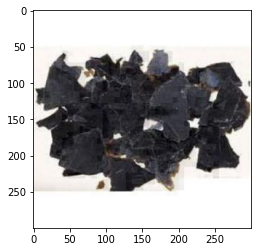

indice del diccionario 0 Corresponde a: Biotite numero de imagen: 1


In [ ]:
index=1 #corroboramos para un ejemplo
plt.imshow(x[index])#mostramos la imgen
plt.show()
print('indice del diccionario', y[index],'Corresponde a:',dic[y[index]],'numero de imagen:',index)

## Datos para entrenamiento y test
La suguiente funcion nos dividio a nuestros datos en entrenamiento y test con el 20% para test, y tambien acomoda las imaganes de forma aleatoria

In [ ]:
from sklearn.model_selection import train_test_split #creamos los conjuntos de test y entrenamiento
#con el 20% de imagenes de test y acomodamos al azar el test y prueba
x_entre,x_test,y_entre,y_test = train_test_split(x,y,test_size=0.2)

print('dimenciones datos de entrenamiento : ', x_entre.shape, y_entre.shape)
print('dimenciones de datos de test: ', x_test.shape, y_test.shape)

dimenciones datos de entrenamiento :  (349, 300, 300, 3) (349,)
dimenciones de datos de test:  (88, 300, 300, 3) (88,)


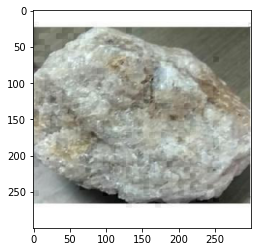

indice del diccionario 2 Corresponde a: quartz Numero de la imagen: 1


In [ ]:
#ejemplo de que se acomodaron al azar
plt.imshow(x_entre[index])
plt.show()
print('indice del diccionario', y_entre[index],'Corresponde a:',dic[y_entre[index]],'Numero de la imagen:',index )

In [ ]:
#Normalizamos nuestras muentras de entrenamiento
x_entre = x_entre/255
x_test = x_test/255

In [ ]:
dic_actual=os.chdir('/content/drive/My Drive')

Nuestras muestras estan en forma de 0 para biotite, pero para entrenar nuestro modelo las salidas en la capa final tienen que tener una forma [1,0,0] para que pueda decir a cual se parece y con la funcion to_categorical, hace eso:

In [ ]:
from tensorflow.keras.utils import to_categorical #importamos para nuestras salidas de la red

y_entre_hot = to_categorical(y_entre)
y_test_hot = to_categorical(y_test)

In [ ]:
print('Elementos y dimenciones de las caracteristicas:',y_entre_hot.shape)
print('Caracteristica de la imagen:',index,'es del tipo' ,y_entre_hot[index],'corresponde a:',dic[y_entre[index]])

Elementos y dimenciones de las caracteristicas: (349, 3)
Caracteristica de la imagen: 1 es del tipo [0. 0. 1.] corresponde a: quartz


In [ ]:
dic_actual=os.chdir('/content/drive/My Drive/Rocas/')
print(os.getcwdb())

b'/content/drive/My Drive/Rocas'


## Arquitectura de red
Importamos las librerias de tensorflow para el analisis de las imaganes:

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

Creamos el modelo de tipo sequential ya que es el que se usa comunmente para el analisis de imaganes.
inicamos con 34 filtros que pasaran en nuestras imaganes una matriz de un tamaño de 3,3 (notamos que entre la matriz sea mas grande baja la presición.
tambien lo realizamos con pocos filtros ya que como es analisis de imaganes consume demasiada RAM del GPU y se desconecta de Colab porque excede los limites.

Posteriormente apagamos una cantidad de neuronas para que se "fuerce" a entrenar con algunas apagadas y despues le pasaamos otra de 64
y volvemos a apagar un porcentaje de neuronas,
despues hacemos un Flatten a las caracteristicas, posteriormente a 50 caracteristicas en una capa densa y la capa final con el numero de clases que seran 3 y para una clasificaicón multiple la mejor función es "softmax"

In [ ]:
def arquitectura_modelo(activation,input_shape,num_classes,dropout):
  model = Sequential()

# Añadimos la primera capa
  model.add(keras.layers.Conv2D(34,(3,3), activation = activation, input_shape = input_shape))
  model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(dropout))
# Añadimos la segunda capa
  model.add(keras.layers.Conv2D(64,(3,3), activation = activation))
  model.add(keras.layers.MaxPooling2D(pool_size = (2,2)))
  model.add(Dropout(dropout))

# Hacemos un flatten para poder usar una red fully connected
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(50, activation=activation))

# Añadimos una capa softmax para que podamos clasificar las imágenes
  model.add(keras.layers.Dense(num_classes, activation='softmax'))
  return model

La activación que se usa comunmente es la relu para el procesamiento de imaganes, y la entrada sera de (300,300,3) y tenemos 3 tipos de clases y con el 25% de neuronas apagadas

In [ ]:
activation = 'relu'
input_shape=(300,300,3)
num_classes=5
dropout=.25
modelo_1=arquitectura_modelo(activation,input_shape,num_classes,dropout)

In [ ]:
modelo_1.summary() #vemos un resumen

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 34)      952       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 34)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 149, 149, 34)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 64)      19648     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 73, 73, 64)        0

In [ ]:
from tensorflow.keras.optimizers import Adam
optimizer = Adam(learning_rate=0.001)

In [ ]:
modelo_1.compile(optimizer=optimizer, #utilizamos el Adam y categorical crossentropy que da mejores resultados para el analisis de imaganes
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
tensorboard_callback = keras.callbacks.TensorBoard( #guardamos el modelo en logs/modelo_R
    log_dir="logs/modelo_R", histogram_freq=1)

In [ ]:
history = modelo_1.fit(x_entre, #entrenamos el modelo a 20 epocas
                       y_entre_hot,
                       batch_size=10,
                       epochs=20,
                       callbacks=[tensorboard_callback],
                       validation_split=0.2,
                       verbose=1)

Epoch 1/20
28/28 [==============================] - 9s 197ms/step - loss: 7.0070 - accuracy: 0.6703 - val_loss: 0.8857 - val_accuracy: 0.6714
Epoch 2/20
28/28 [==============================] - 4s 140ms/step - loss: 0.3583 - accuracy: 0.8495 - val_loss: 0.6385 - val_accuracy: 0.6143
Epoch 3/20
28/28 [==============================] - 4s 132ms/step - loss: 0.3230 - accuracy: 0.9032 - val_loss: 0.5918 - val_accuracy: 0.8143
Epoch 4/20
28/28 [==============================] - 4s 135ms/step - loss: 0.2829 - accuracy: 0.9068 - val_loss: 0.5222 - val_accuracy: 0.8000
Epoch 5/20
28/28 [==============================] - 4s 139ms/step - loss: 0.1716 - accuracy: 0.9462 - val_loss: 0.5164 - val_accuracy: 0.8143
Epoch 6/20
28/28 [==============================] - 4s 136ms/step - loss: 0.1208 - accuracy: 0.9677 - val_loss: 0.3866 - val_accuracy: 0.8857
Epoch 7/20
28/28 [==============================] - 4s 136ms/step - loss: 0.0756 - accuracy: 0.9821 - val_loss: 0.4338 - val_accuracy: 0.8286
Epoch 

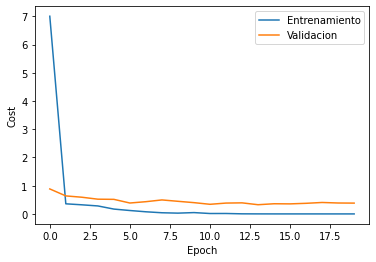

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validacion'], loc='upper right')
plt.show()

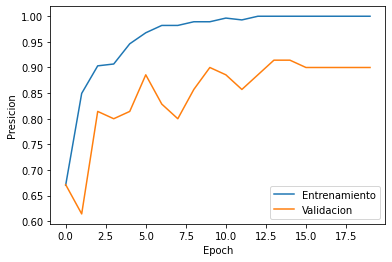

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Presicion')
plt.xlabel('Epoch')
plt.legend(['Entrenamiento', 'Validacion'], loc='lower right')
plt.show()

## Vemos la presicón del modelo

In [ ]:
evaluations = modelo_1.evaluate(x = x_test, y =y_test_hot)

print ("Loss = " + str(evaluations[0]))
print ("Test presición = " + str(evaluations[1]))

3/3 [==============================] - 1s 215ms/step - loss: 0.4168 - accuracy: 0.8636
Loss = 0.41681480407714844
Test presición = 0.8636363744735718


In [ ]:
# Evaluamos los 10 primero

evaluations = modelo_1.evaluate(x = x_test[:10], y = y_test_hot[:10])

print ("Loss = " + str(evaluations[0]))
print ("Test presición = " + str(evaluations[1]))


1/1 [==============================] - 0s 30ms/step - loss: 0.4093 - accuracy: 0.9000
Loss = 0.4093024730682373
Test presición = 0.8999999761581421


In [ ]:
# Predecir la imagen asociada a cada muestra en el conjunto de prueba (X_test)
predictions = modelo_1.predict(x_test)

In [ ]:
index = 40
# Predicción de la imagen asociada a la muestra
# np.argmax devuelve el índice del valor máximo

prediction = np.argmax(predictions[index])

print('indice de imagen del test:', index, 'la prediccion es:', dic[prediction])

indice de imagen del test: 40 la prediccion es: quartz


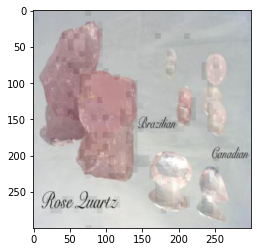

indice del diccionario: 2 Corresponde a: quartz


In [ ]:
plt.imshow(x_test[index])
plt.show()
print('indice del diccionario:', y_test[index],'Corresponde a:',dic[y_test[index]] )

In [ ]:
Raiz=os.getcwdb() #vemos la dirección actual
print(Raiz)
dic_rocas=os.chdir('/content/drive/My Drive/Rocas/') #nos colocamos en rocas
print(os.getcwdb())
dic_rocas=['biotite_aum', 'malachite_aum','quartz_aum'] #creamos un diccionario con los nombres de las carpetas

b'/content/drive/MyDrive/Rocas'
b'/content/drive/My Drive/Rocas'


## ¿Cuales precide bien y cuales predice mal?

In [ ]:
predictions = modelo_1.predict(x_test)
lista_pre=[] #creamos una lista con las predicciones
for i in range(len(predictions)):
  prediction=np.argmax(predictions[i])
  lista_pre.append(prediction)

In [ ]:
y_test=list(y_test) #volvemos a y_test en lista para poder indentifcar mejor

In [ ]:
#creamos un algoritmo que nos vaya añadiendo los indices cuando no sean iguales es decir cuando fallo la prediccion
lista_index=[]
index=0
for i in range(len(y_test)):
  if y_test[i] != lista_pre[i]:
    lista_index.append(index)
  index +=1
print('total de imaganes mal predichas por el modelo:',len(lista_index))

total de imaganes mal predichas por el modelo: 12


Corresponde a: quartz La predicción fue: Biotite


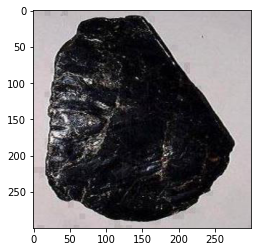

Corresponde a: Biotite La predicción fue: quartz


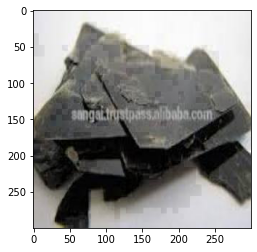

Corresponde a: malachite La predicción fue: quartz


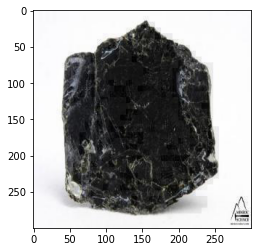

Corresponde a: malachite La predicción fue: Biotite


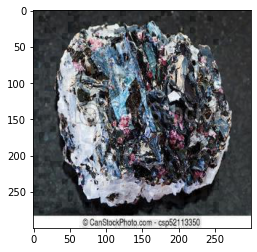

Corresponde a: quartz La predicción fue: Biotite


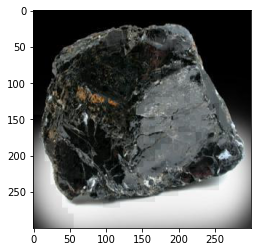

Corresponde a: Biotite La predicción fue: malachite


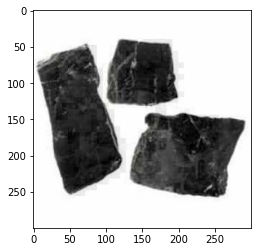

Corresponde a: Biotite La predicción fue: malachite


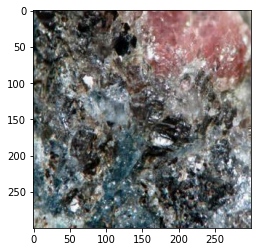

Corresponde a: quartz La predicción fue: malachite


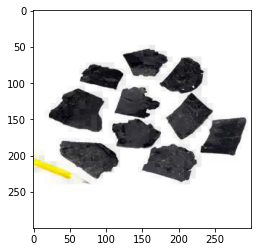

Corresponde a: malachite La predicción fue: Biotite


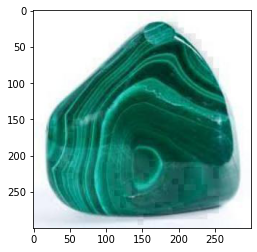

Corresponde a: quartz La predicción fue: Biotite


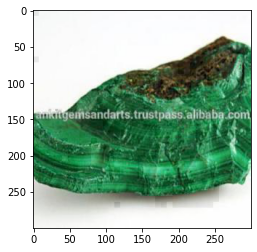

Corresponde a: quartz La predicción fue: Biotite


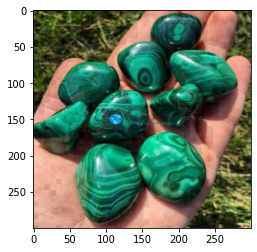

Corresponde a: Biotite La predicción fue: malachite


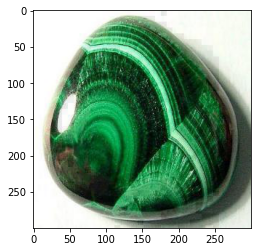

In [ ]:
for j in range(len(lista_index)): #vemos cuales son esas imaganes para mostrar el aumento de datos
    index=lista_index[j]
    print('Corresponde a:',dic[y_test[index]],'La predicción fue:',dic[lista_pre[index]] )
    plt.imshow(img_total[index])
    plt.show()

Notamos que hay mas errores al entrenarla con pocos datos de Biotite por lo que el aumento de datos es necesario

## Aumento de datos
Notamos que con los resultados anteriores tenemos un presición bastante buena pero ¿En cuales son las que falla más? porque recordamos que tenemos solo 66 imaganes de biotite y 219 de malachite, por lo que entreno más con imaganes de malachite y eso nos podría dar overfitting en malaquite y underfitting en biotite, por lo que usaremos el aumento de datos, primero duplicando los datos 2 pero rotandolas, reflejandolas o moviendolas un poco para que no sea una copia como tal.

Tendremos otro colab donde colocaremos los datos en aproximadamente las mismas proporciones que se llama datos aumentados igual proporcion para ver su desempeño

In [ ]:
print(os.getcwdb())
dic_quartz=os.chdir('/content/drive/My Drive/Rocas_aum') #repetimos el proceso
print(os.getcwdb())

b'/content/drive/My Drive/Rocas'
b'/content/drive/My Drive/Rocas_aum'


Usamos la funcion de keras para procesar imaganes y las imagenes resultades las guardaremos en una nueva carpeta llamada rocas_aum y rocas_aum1 y lo correremos en otro colab, ya que a veces la memoria de la GPU llega a sus limites en un mismo colab y no podemos avanzar y como tendremos más imagenes sera un mayor procesamiento en GPU

In [ ]:
import numpy as np
import cv2
from keras.preprocessing.image import ImageDataGenerator, load_img, image, img_to_array

In [ ]:
#DG_folder='biotite_aum1'
images_increased = 7
try:
    os.mkdir(DG_folder)
except:
    print("")

train_datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False)

data_path = "/content/drive/My Drive/Rocas/biotite"
data_dir_list = os.listdir(data_path)

i=0
num_images=0
#for image_file in data_dir_list:
    img_list=os.listdir(data_path)

    img_path = data_path + '/'+ image_file

    imge=load_img(img_path)

    imge=cv2.resize(image.img_to_array(imge), (300, 300), interpolation = cv2.INTER_AREA)
    x= imge/255
    x=np.expand_dims(x,axis=0)
    t=1
    for output_batch in train_datagen.flow(x,batch_size=1):
        a=image.img_to_array(output_batch[0])
        imagen=output_batch[0,:,:]*255
        imgfinal = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
        cv2.imwrite(DG_folder+"/%i%i.jpg"%(i,t), imgfinal)
        t+=1

        num_images+=1
        if t>images_increased:
            break
    i+=1

print("images generated",num_images) #guaradamos las imgenes en la carpeta Rocas_aum

IndentationError: ignored

el codigo anterior no es ejecutado porque crearia más imagenes y ya las tenemos en las carpetas correspondientes

## Colab con los datos aumentados x2


Colab con los datos aumentados

https://colab.research.google.com/drive/1VGGPtvDPoAFsDYtRsvdG0eep265Rc3Sh?usp=sharing

Drive con los datos aumentados

https://drive.google.com/drive/folders/11qkNLjD03JW-1QLlu52-3KM65q-Pc9L3?usp=sharing

## Colab con los datos aumentados de igual proporcion

Colan con los datos aumentados de igual proporcion

https://colab.research.google.com/drive/1cz6cDKNGf3EFNG98Ok5KD9HgsawrMDgc?usp=sharing

Drive con los datos aumentados de igual proporcion

https://drive.google.com/drive/folders/1s9V4jVXzsqKhIWsa7NbhhcaPg6T2TvTT?usp=sharing

## Comparación de modelos

Al correrlos una vez obtenemos las siguientes graficas para el primer modelo (sin aumento de datos), para el segundo modelo (aumentados por dos) y para el tercer model (aumentados misma proporción igual)


La presición de los de un entrenamiento común son:

Presición Rocas: 0.8636363744735718

Presición Rocas aumentado:0.9599999785423279

Presición de Rocas aumentado de misma proproción: 0.970370352268219

La perdida de los 3 entrenamientos común son:

Perdida Rocas:0.41681480407714844

Perdida Rocas aumentado:0.15415820479393005

Perdida Rocas aumentado de misma proporcion:0.17121124267578125




### Presición de los 3 modelos

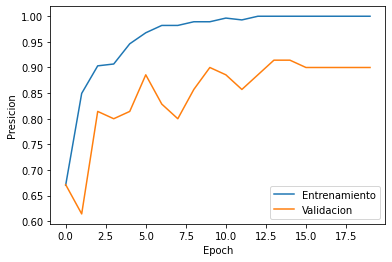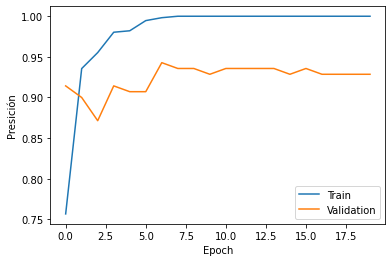
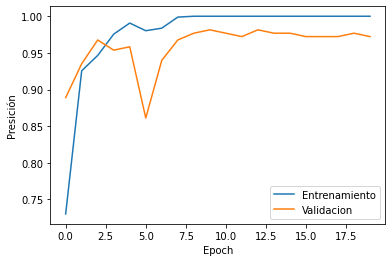


Perdida de los 3 modelos:

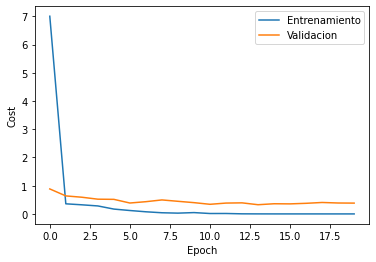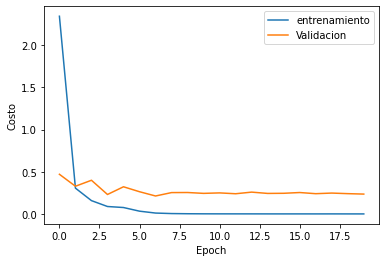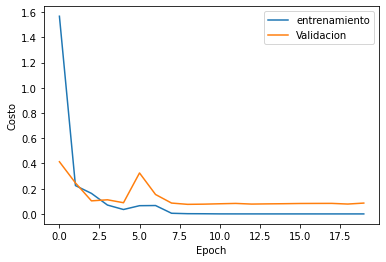